<a href="https://colab.research.google.com/github/danlingzhou16/stat390/blob/GraceZhu/Feature_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
y_train=pd.read_csv('/content/gdrive/MyDrive/complete covid dataset/covid_y_train.csv')
X_train=pd.read_csv('/content/gdrive/MyDrive/complete covid dataset/covid_x_train.csv')
y_test=pd.read_csv('/content/gdrive/MyDrive/complete covid dataset/covid_y_test.csv')
X_test=pd.read_csv('/content/gdrive/MyDrive/complete covid dataset/covid_x_test.csv')

In [19]:
# merge the dataset back together
train = X_train.merge(y_train, left_index = True, right_index = True)
train.tail()

,date,location_key_x,country_code,new_deceased,cumulative_deceased,population,population_male,population_female,latitude,longitude,...,TX.VAL.MRCH.R1.ZS,TX.VAL.MRCH.R2.ZS,TX.VAL.MRCH.R3.ZS,TX.VAL.MRCH.R4.ZS,TX.VAL.MRCH.R5.ZS,TX.VAL.MRCH.R6.ZS,TX.VAL.MRCH.RS.ZS,TX.VAL.MRCH.WL.CD,TX.VAL.MRCH.XD.WD,new_confirmed
70824,2021-12-27,AU_WA,AU,0.0,9.0,2656156.0,1120500.0,1111402.0,-26.0,121.0,...,43.125018,0.391859,0.636003,0.412975,5.101246,0.912642,2.018508,2.546920e+11,402.530005,2.0
70825,2021-12-28,AU_WA,AU,0.0,9.0,2656156.0,1120500.0,1111402.0,-26.0,121.0,...,43.125018,0.391859,0.636003,0.412975,5.101246,0.912642,2.018508,2.546920e+11,402.530005,3.0
70826,2021-12-29,AU_WA,AU,0.0,9.0,2656156.0,1120500.0,1111402.0,-26.0,121.0,...,43.125018,0.391859,0.636003,0.412975,5.101246,0.912642,2.018508,2.546920e+11,402.530005,0.0
70827,2021-12-30,AU_WA,AU,0.0,9.0,2656156.0,1120500.0,1111402.0,-26.0,121.0,...,43.125018,0.391859,0.636003,0.412975,5.101246,0.912642,2.018508,2.546920e+11,402.530005,5.0
70828,2021-12-31,AU_WA,AU,0.0,9.0,2656156.0,1120500.0,1111402.0,-26.0,121.0,...,43.125018,0.391859,0.636003,0.412975,5.101246,0.912642,2.018508,2.546920e+11,402.530005,5.0


In [20]:
test = X_test.merge(y_test, left_index = True, right_index = True)
test.head()

,date,location_key_x,country_code,new_deceased,cumulative_deceased,population,population_male,population_female,latitude,longitude,...,TX.VAL.MRCH.R1.ZS,TX.VAL.MRCH.R2.ZS,TX.VAL.MRCH.R3.ZS,TX.VAL.MRCH.R4.ZS,TX.VAL.MRCH.R5.ZS,TX.VAL.MRCH.R6.ZS,TX.VAL.MRCH.RS.ZS,TX.VAL.MRCH.WL.CD,TX.VAL.MRCH.XD.WD,new_confirmed
0,2022-01-01,US_AK,US,0.0,1108.0,733391.0,424916.0,391925.0,64.0,-150.0,...,10.447935,1.398441,23.603533,0.908951,2.398344,0.944532,0.138105,1.664240e+12,213.064797,900.0
1,2022-01-02,US_AK,US,1.0,1109.0,733391.0,424916.0,391925.0,64.0,-150.0,...,10.447935,1.398441,23.603533,0.908951,2.398344,0.944532,0.138105,1.664240e+12,213.064797,231.0
2,2022-01-03,US_AK,US,2.0,1111.0,733391.0,424916.0,391925.0,64.0,-150.0,...,10.447935,1.398441,23.603533,0.908951,2.398344,0.944532,0.138105,1.664240e+12,213.064797,634.0
3,2022-01-04,US_AK,US,2.0,1113.0,733391.0,424916.0,391925.0,64.0,-150.0,...,10.447935,1.398441,23.603533,0.908951,2.398344,0.944532,0.138105,1.664240e+12,213.064797,896.0
4,2022-01-05,US_AK,US,1.0,1114.0,733391.0,424916.0,391925.0,64.0,-150.0,...,10.447935,1.398441,23.603533,0.908951,2.398344,0.944532,0.138105,1.664240e+12,213.064797,1777.0


In [21]:
data = pd.concat([train, test], ignore_index=True)

In [71]:
num_rows_before = data.shape[0]
data = data[data['new_confirmed'] >= 0]
num_rows_after = data.shape[0]
num_rows_dropped = num_rows_before - num_rows_after

print(f"Number of rows dropped: {num_rows_dropped}")

Number of rows dropped: 145


In [76]:
# check if it's stacked properly
data.iloc[70725:70735]

,date,location_key_x,country_code,new_deceased,cumulative_deceased,population,population_male,population_female,latitude,longitude,...,new_confirmed_min7,day_name,day_of_week,quarter,month,year,dayofyear,dayofmonth,weekofyear,season
70827,2021-12-30,AU_WA,AU,0.0,9.0,2656156.0,1120500.0,1111402.0,-26.0,121.0,...,0.0,Thursday,3,4,12,2021,364,30,52,Summer
70828,2021-12-31,AU_WA,AU,0.0,9.0,2656156.0,1120500.0,1111402.0,-26.0,121.0,...,0.0,Friday,4,4,12,2021,365,31,52,Summer
70829,2022-01-01,US_AK,US,0.0,1108.0,733391.0,424916.0,391925.0,64.0,-150.0,...,91.0,Saturday,5,1,1,2022,1,1,52,Winter
70830,2022-01-02,US_AK,US,1.0,1109.0,733391.0,424916.0,391925.0,64.0,-150.0,...,231.0,Sunday,6,1,1,2022,2,2,52,Winter
70831,2022-01-03,US_AK,US,2.0,1111.0,733391.0,424916.0,391925.0,64.0,-150.0,...,231.0,Monday,0,1,1,2022,3,3,1,Winter
70832,2022-01-04,US_AK,US,2.0,1113.0,733391.0,424916.0,391925.0,64.0,-150.0,...,231.0,Tuesday,1,1,1,2022,4,4,1,Winter
70833,2022-01-05,US_AK,US,1.0,1114.0,733391.0,424916.0,391925.0,64.0,-150.0,...,231.0,Wednesday,2,1,1,2022,5,5,1,Winter
70834,2022-01-06,US_AK,US,1.0,1115.0,733391.0,424916.0,391925.0,64.0,-150.0,...,231.0,Thursday,3,1,1,2022,6,6,1,Winter
70835,2022-01-07,US_AK,US,5.0,1120.0,733391.0,424916.0,391925.0,64.0,-150.0,...,231.0,Friday,4,1,1,2022,7,7,1,Winter
70836,2022-01-08,US_AK,US,1.0,1121.0,733391.0,424916.0,391925.0,64.0,-150.0,...,231.0,Saturday,5,1,1,2022,8,8,1,Winter


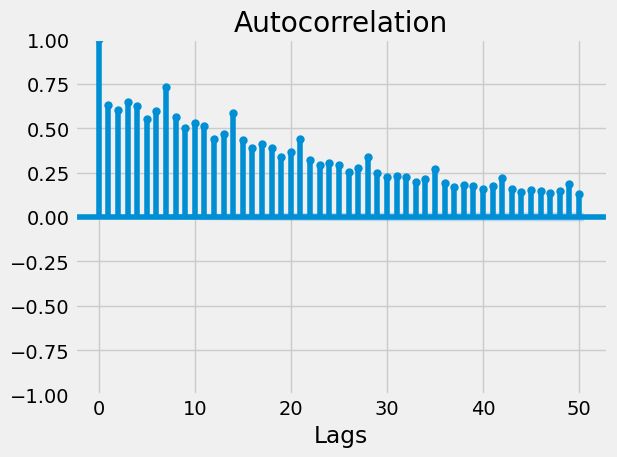

In [77]:
# Autocorrelation

alpha=0.05
# Select a multiple of the seasonal frequency for the number of lags
plot_acf(data['new_confirmed'])
plt.xlabel('Lags')
plt.tight_layout()

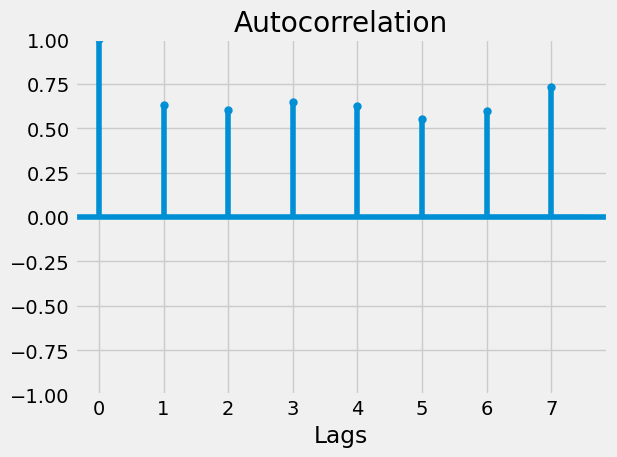

In [78]:
plot_acf(data['new_confirmed'], lags=7)
plt.xlabel('Lags')
plt.tight_layout()

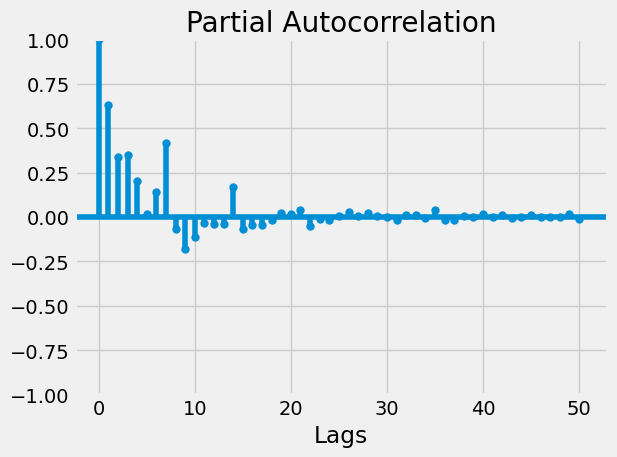

In [79]:
# Partial Autocorrelation
plot_pacf(data['new_confirmed'])
plt.xlabel('Lags')
plt.tight_layout()
plt.show()


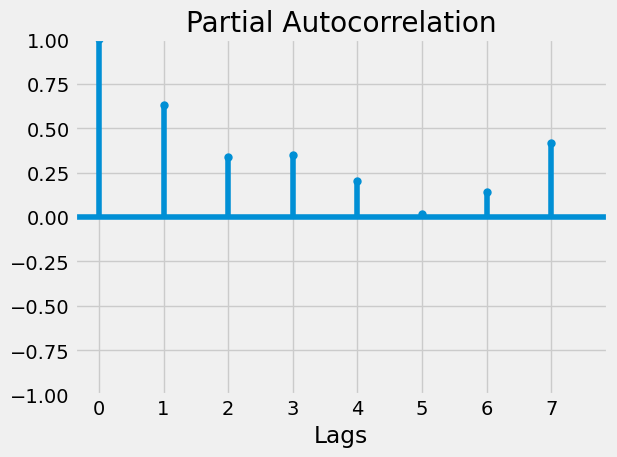

In [80]:
# Partial Autocorrelation
plot_pacf(data['new_confirmed'], lags=7)
plt.xlabel('Lags')
plt.tight_layout()
plt.show()

In [81]:
# Adding lags features
# Autocorrelation - peak: lag7, lag3, lag1
# Partial autocorrelation - peak: lag1, lag7, lag3

# Lags features
data['new_confirmed_lag1'] = data.groupby('location_key_x')['new_confirmed'].shift(1)
data['new_confirmed_lag3'] = data.groupby('location_key_x')['new_confirmed'].shift(3)
data['new_confirmed_lag7'] = data.groupby('location_key_x')['new_confirmed'].shift(7)

In [82]:
# Rolling window statistics
data['new_confirmed_mean1'] = data.groupby('location_key_x')['new_confirmed'].rolling(window = 1).mean().reset_index(level=0, drop=True)
data['new_confirmed_mean3'] = data.groupby('location_key_x')['new_confirmed'].rolling(window = 3).mean().reset_index(level=0, drop=True)
data['new_confirmed_mean7'] = data.groupby('location_key_x')['new_confirmed'].rolling(window = 7).mean().reset_index(level=0, drop=True)

In [83]:
data['new_confirmed_std1'] = data.groupby('location_key_x')['new_confirmed'].rolling(window = 1).std().reset_index(level=0, drop=True)
data['new_confirmed_std3'] = data.groupby('location_key_x')['new_confirmed'].rolling(window = 3).std().reset_index(level=0, drop=True)
data['new_confirmed_std7'] = data.groupby('location_key_x')['new_confirmed'].rolling(window = 7).std().reset_index(level=0, drop=True)

In [84]:
data['new_confirmed_max1'] = data.groupby('location_key_x')['new_confirmed'].rolling(window = 1).max().reset_index(level=0, drop=True)
data['new_confirmed_max3'] = data.groupby('location_key_x')['new_confirmed'].rolling(window = 3).max().reset_index(level=0, drop=True)
data['new_confirmed_max7'] = data.groupby('location_key_x')['new_confirmed'].rolling(window = 7).max().reset_index(level=0, drop=True)

In [85]:
data['new_confirmed_min1'] = data.groupby('location_key_x')['new_confirmed'].rolling(window = 1).min().reset_index(level=0, drop=True)
data['new_confirmed_min3'] = data.groupby('location_key_x')['new_confirmed'].rolling(window = 3).min().reset_index(level=0, drop=True)
data['new_confirmed_min7'] = data.groupby('location_key_x')['new_confirmed'].rolling(window = 7).min().reset_index(level=0, drop=True)

In [86]:
data.head(10)

,date,location_key_x,country_code,new_deceased,cumulative_deceased,population,population_male,population_female,latitude,longitude,...,new_confirmed_min7,day_name,day_of_week,quarter,month,year,dayofyear,dayofmonth,weekofyear,season
0,2020-01-22,US_AK,US,0.0,0.0,733391.0,424916.0,391925.0,64.0,-150.0,...,NaN,Wednesday,2,1,1,2020,22,22,4,Winter
1,2020-01-23,US_AK,US,0.0,0.0,733391.0,424916.0,391925.0,64.0,-150.0,...,NaN,Thursday,3,1,1,2020,23,23,4,Winter
2,2020-01-24,US_AK,US,0.0,0.0,733391.0,424916.0,391925.0,64.0,-150.0,...,NaN,Friday,4,1,1,2020,24,24,4,Winter
3,2020-01-25,US_AK,US,0.0,0.0,733391.0,424916.0,391925.0,64.0,-150.0,...,NaN,Saturday,5,1,1,2020,25,25,4,Winter
4,2020-01-26,US_AK,US,0.0,0.0,733391.0,424916.0,391925.0,64.0,-150.0,...,NaN,Sunday,6,1,1,2020,26,26,4,Winter
5,2020-01-27,US_AK,US,0.0,0.0,733391.0,424916.0,391925.0,64.0,-150.0,...,NaN,Monday,0,1,1,2020,27,27,5,Winter
6,2020-01-28,US_AK,US,0.0,0.0,733391.0,424916.0,391925.0,64.0,-150.0,...,0.0,Tuesday,1,1,1,2020,28,28,5,Winter
7,2020-01-29,US_AK,US,0.0,0.0,733391.0,424916.0,391925.0,64.0,-150.0,...,0.0,Wednesday,2,1,1,2020,29,29,5,Winter
8,2020-01-30,US_AK,US,0.0,0.0,733391.0,424916.0,391925.0,64.0,-150.0,...,0.0,Thursday,3,1,1,2020,30,30,5,Winter
9,2020-01-31,US_AK,US,0.0,0.0,733391.0,424916.0,391925.0,64.0,-150.0,...,0.0,Friday,4,1,1,2020,31,31,5,Winter


In [88]:
data['date']         = pd.to_datetime(data['date'])
data['day_name']        = data['date'].dt.day_name()
data['day_of_week']     = data['date'].dt.dayofweek
data['quarter']        = data['date'].dt.quarter
data['month']         = data['date'].dt.month
data['year']            = data['date'].dt.year
data['dayofyear']        = data['date'].dt.dayofyear
data['dayofmonth']       = data['date'].dt.day
data['weekofyear']       = data['date'].dt.isocalendar().week.astype(np.int64)

In [89]:
data.head()

,date,location_key_x,country_code,new_deceased,cumulative_deceased,population,population_male,population_female,latitude,longitude,...,new_confirmed_min7,day_name,day_of_week,quarter,month,year,dayofyear,dayofmonth,weekofyear,season
0,2020-01-22,US_AK,US,0.0,0.0,733391.0,424916.0,391925.0,64.0,-150.0,...,NaN,Wednesday,2,1,1,2020,22,22,4,Winter
1,2020-01-23,US_AK,US,0.0,0.0,733391.0,424916.0,391925.0,64.0,-150.0,...,NaN,Thursday,3,1,1,2020,23,23,4,Winter
2,2020-01-24,US_AK,US,0.0,0.0,733391.0,424916.0,391925.0,64.0,-150.0,...,NaN,Friday,4,1,1,2020,24,24,4,Winter
3,2020-01-25,US_AK,US,0.0,0.0,733391.0,424916.0,391925.0,64.0,-150.0,...,NaN,Saturday,5,1,1,2020,25,25,4,Winter
4,2020-01-26,US_AK,US,0.0,0.0,733391.0,424916.0,391925.0,64.0,-150.0,...,NaN,Sunday,6,1,1,2020,26,26,4,Winter


In [90]:
# season:

# - Winter -> December (12), January (01) and February (02);
# - Spring -> March (03), April (04) and May (05);
# - Summer -> Jun (06), July (07) and August (08);
# - Autumn -> September (09), October (10) and November (11).
data['season'] = data['date'].apply( lambda x: 'Winter' if x.month == 12 or x.month == 1 or
                                      x.month == 2 else 'Spring' if  x.month == 3 or
                                      x.month == 4 or x.month == 5 else 'Summer' if
                                      x.month == 6 or x.month == 7 or
                                      x.month == 8 else 'Autumn' if
                                      x.month == 9 or x.month == 10 or x.month == 11 else '')

In [91]:
data.head()

,date,location_key_x,country_code,new_deceased,cumulative_deceased,population,population_male,population_female,latitude,longitude,...,new_confirmed_min7,day_name,day_of_week,quarter,month,year,dayofyear,dayofmonth,weekofyear,season
0,2020-01-22,US_AK,US,0.0,0.0,733391.0,424916.0,391925.0,64.0,-150.0,...,NaN,Wednesday,2,1,1,2020,22,22,4,Winter
1,2020-01-23,US_AK,US,0.0,0.0,733391.0,424916.0,391925.0,64.0,-150.0,...,NaN,Thursday,3,1,1,2020,23,23,4,Winter
2,2020-01-24,US_AK,US,0.0,0.0,733391.0,424916.0,391925.0,64.0,-150.0,...,NaN,Friday,4,1,1,2020,24,24,4,Winter
3,2020-01-25,US_AK,US,0.0,0.0,733391.0,424916.0,391925.0,64.0,-150.0,...,NaN,Saturday,5,1,1,2020,25,25,4,Winter
4,2020-01-26,US_AK,US,0.0,0.0,733391.0,424916.0,391925.0,64.0,-150.0,...,NaN,Sunday,6,1,1,2020,26,26,4,Winter


In [92]:
data.country_code.unique()

array(['US', 'LU', 'IE', 'NO', 'CH', 'SG', 'QA', 'IS', 'DK', 'AU'],
      dtype=object)

In [93]:
# Australia's reasons are opposite
def map_month_to_season(month):
    if month == 9 or month == 10 or month == 11:
        return 'Spring'
    elif month == 12 or month == 1 or month == 2:
        return 'Summer'
    elif month == 3 or month == 4 or month == 5:
        return 'Autumn'
    elif month == 6 or month == 7 or month == 8:
        return 'Winter'

In [94]:
data.loc[data['country_code'] == 'AU', 'season'] = data.loc[data['country_code'] == 'AU', 'month'].apply(map_month_to_season)

In [95]:
data.loc[data['country_code'] == 'AU', ['country_code','month', 'season']]

,country_code,month,season
68786,AU,1,Summer
68787,AU,1,Summer
68788,AU,1,Summer
68789,AU,2,Summer
68790,AU,2,Summer
...,...,...,...
97089,AU,9,Spring
97090,AU,9,Spring
97091,AU,9,Spring
97092,AU,9,Spring


In [96]:
feature_and_target = data[['date', 'new_confirmed',
                           'new_confirmed_lag1','new_confirmed_lag3', 'new_confirmed_lag7',
                           'new_confirmed_mean1','new_confirmed_mean3','new_confirmed_mean7',
                           'new_confirmed_std1','new_confirmed_std3','new_confirmed_std7',
                           'new_confirmed_max1','new_confirmed_max3','new_confirmed_max7',
                           'new_confirmed_min1','new_confirmed_min3','new_confirmed_min7',
                           'day_name','day_of_week','quarter','month','year','dayofyear','dayofmonth','weekofyear']]

In [97]:
# holidays

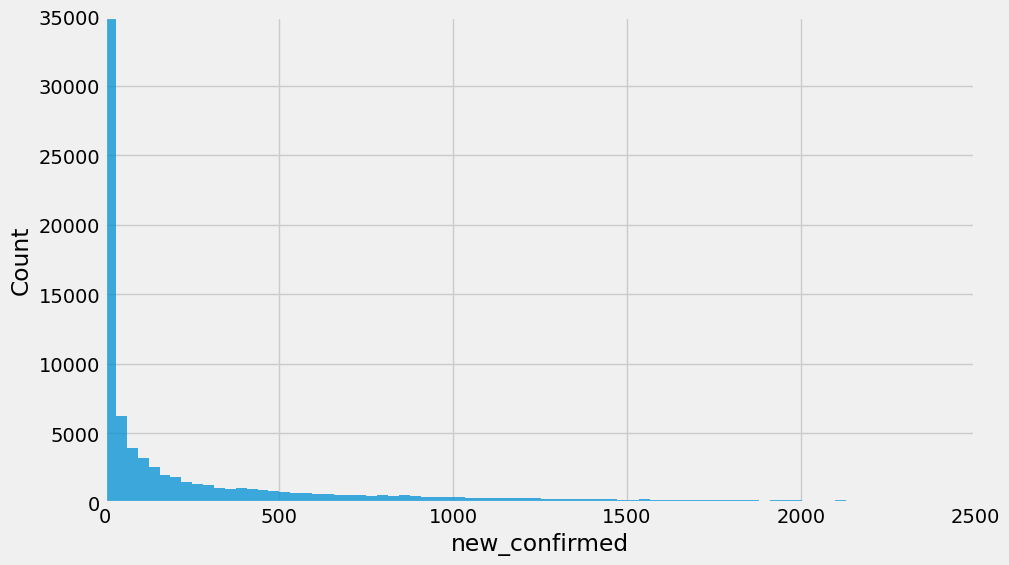

In [98]:
# EDA
# Univariate analysis
plt.figure(figsize=(10, 6))
sns.histplot(data['new_confirmed'], kde=False )
plt.xlim(0, 2500)
plt.ylim(0, 35000)
plt.show()

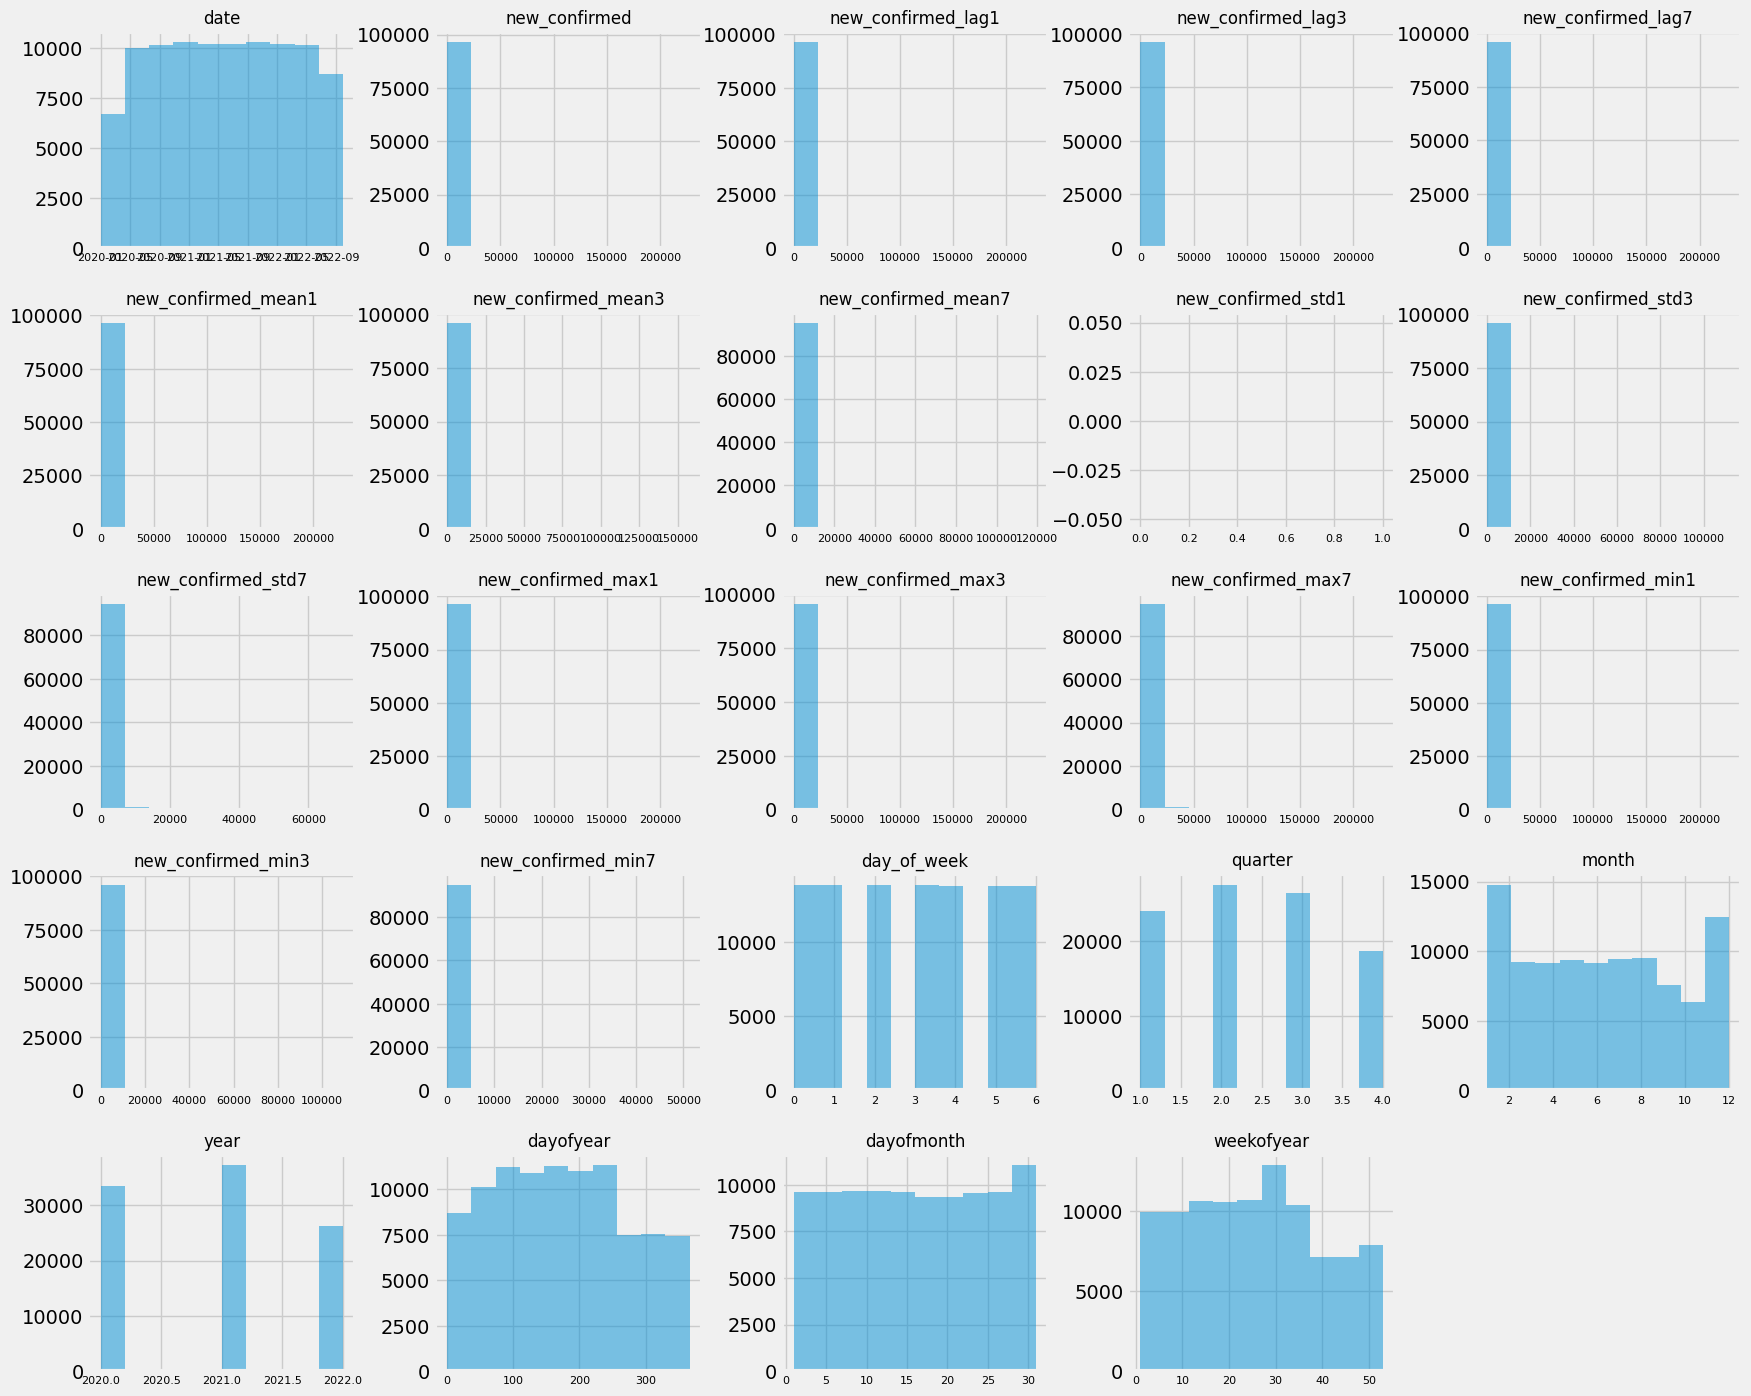

In [113]:

hist = feature_and_target.hist(figsize=(19, 20), layout=(6, 5), alpha=0.5)

# Set the font size for the titles
for ax in hist.flatten():
    ax.title.set_size(12)  # Adjust the font size (12 is an example, change it to your preferred size)

for ax in hist.flatten():
    ax.tick_params(axis='x', labelsize=8)

# Show the plot
plt.show()


<Axes: xlabel='season', ylabel='count'>

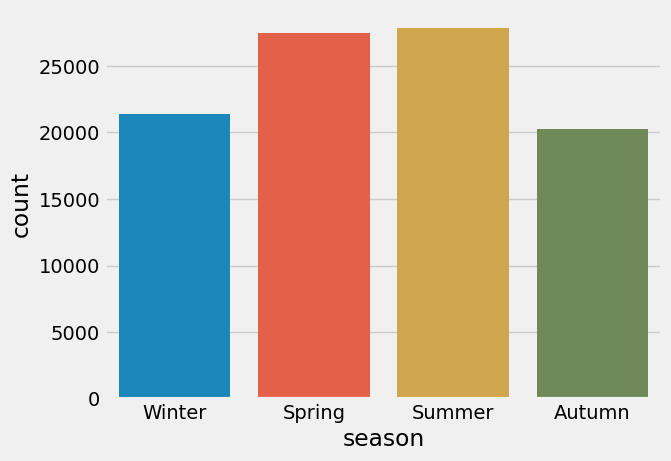

In [100]:
sns.countplot( x = 'season', data = data)

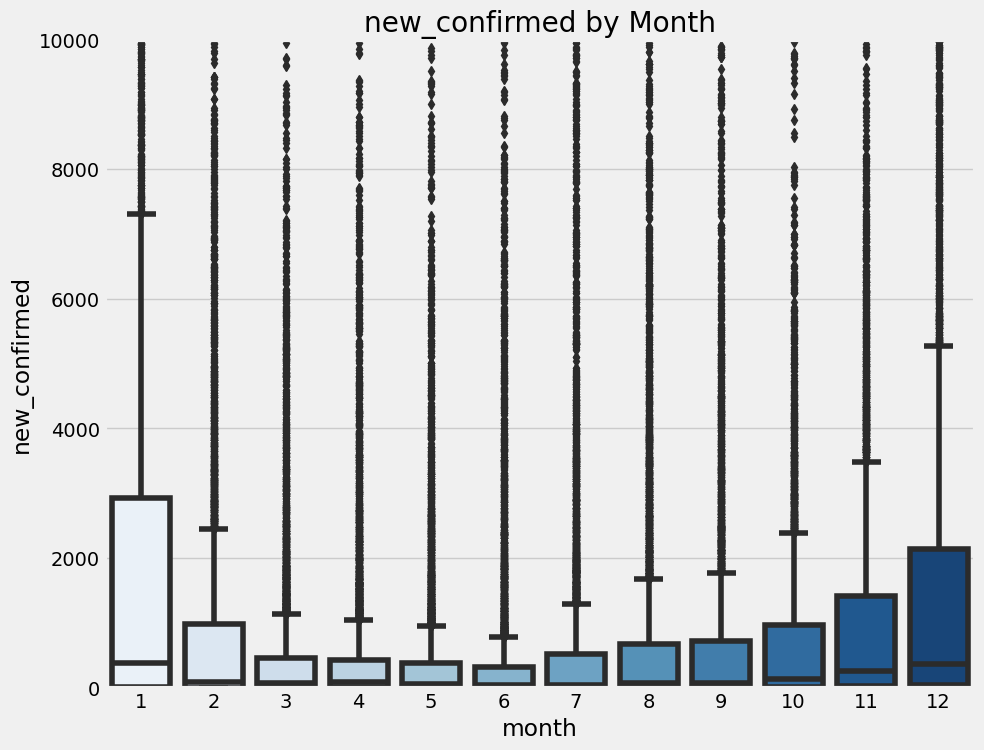

In [109]:
# viaualize the monthly Megawatt
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=feature_and_target, x='month', y='new_confirmed', palette='Blues')
ax.set_title('new_confirmed by Month')
plt.ylim(0, 10000)
plt.show()

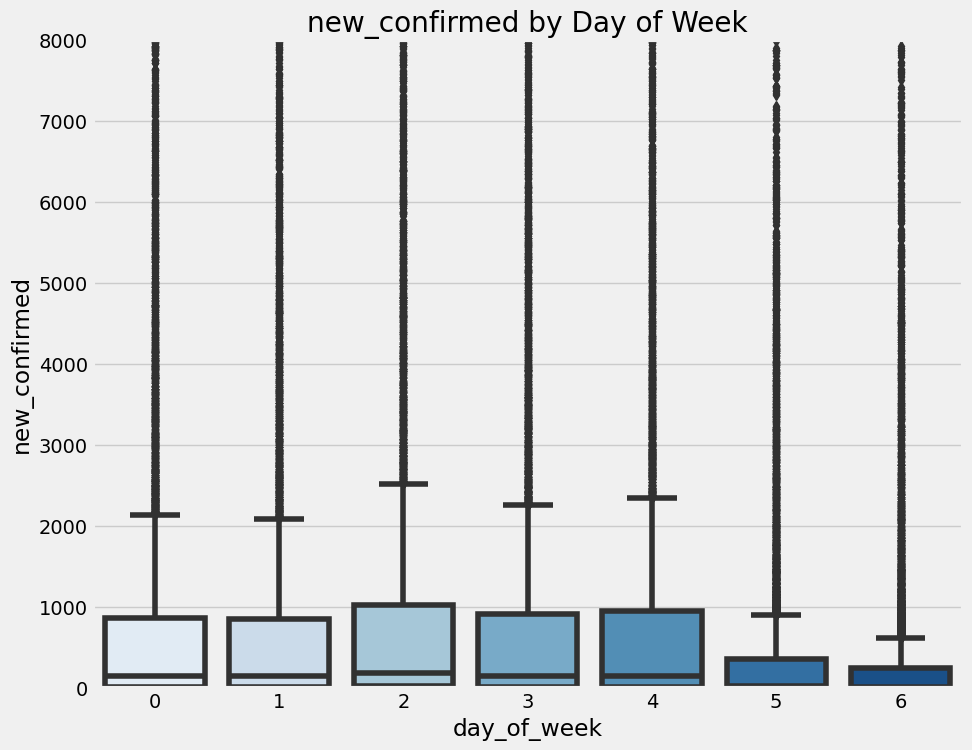

In [108]:
# viaualize the monthly Megawatt
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=feature_and_target, x='day_of_week', y='new_confirmed', palette='Blues')
ax.set_title('new_confirmed by Day of Week')
plt.ylim(0, 8000)
plt.show()


<ipython-input-103-9c9dec9e6d84>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = feature_and_target.corr( method='pearson' )


<Axes: >

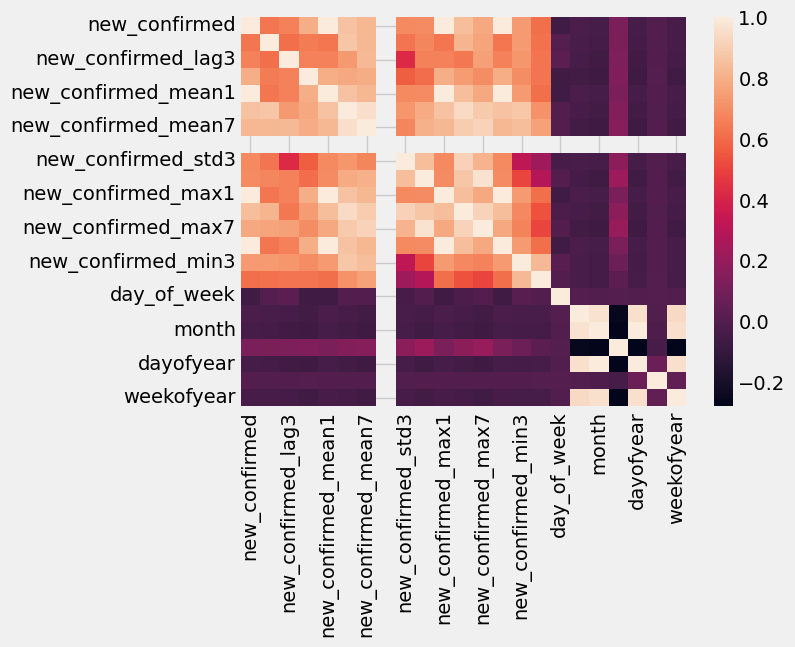

In [103]:
# Multivariate Analysis
correlation = feature_and_target.corr( method='pearson' )
sns.heatmap( correlation )